In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset-with-column-names/housing.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

The Boston Housing Dataset is a widely used dataset in machine learning and statistics, particularly for regression analysis. It was collected by researchers from the University of Chicago and the Massachusetts Institute of Technology (MIT) in the 1970s and is often used to demonstrate and test regression algorithms. The dataset is built around the task of predicting the median value of owner-occupied homes in various Boston suburbs.

Here are key details about the Boston Housing Dataset:

1. **Attributes/Features:**
   - There are 13 numerical input features in the dataset.
   - Features include data related to factors influencing housing prices, such as crime rate, property tax, teacher-student ratio, etc.

2. **Target Variable:**
   - The target variable is the median value of owner-occupied homes (in thousands of dollars) for a given suburb.
   - This variable, often denoted as "MEDV," is the variable that a linear regression model would typically try to predict.

3. **Size:**
   - The dataset consists of a total of 506 data points, each representing a suburb in Boston.

4. **Usage:**
   - The dataset is frequently used for regression analysis tasks, especially to test and demonstrate linear regression models.
   - Researchers and practitioners often use it as a benchmark for evaluating the performance of different regression algorithms.

5. **Purpose:**
   - The dataset was originally collected to study the relationship between various socio-economic factors and housing prices in Boston suburbs.
   - It serves as a valuable resource for understanding the complexities involved in predicting real-world housing prices.

6. **Availability:**
   - The Boston Housing Dataset is readily available in popular machine learning libraries such as scikit-learn.
   - It can also be accessed through online repositories and is often included in educational materials and tutorials.

For linear regression modeling, one can use the features in the dataset to build a model that predicts the median value of owner-occupied homes. The goal is to find the linear relationship between the input features and the target variable, allowing for the estimation of housing prices based on different factors. The dataset is suitable for exploring concepts like feature selection, model evaluation, and understanding the impact of various features on the prediction of housing prices.

In [3]:
df1 = pd.read_csv("/kaggle/input/boston-housing-dataset-with-column-names/housing.csv")
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of (people of African American descent) by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [5]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Before we make any changes to the dataset, let's duplicate the dataset.

In [6]:
df = df1.copy()

## Understanding the dataset

<Axes: >

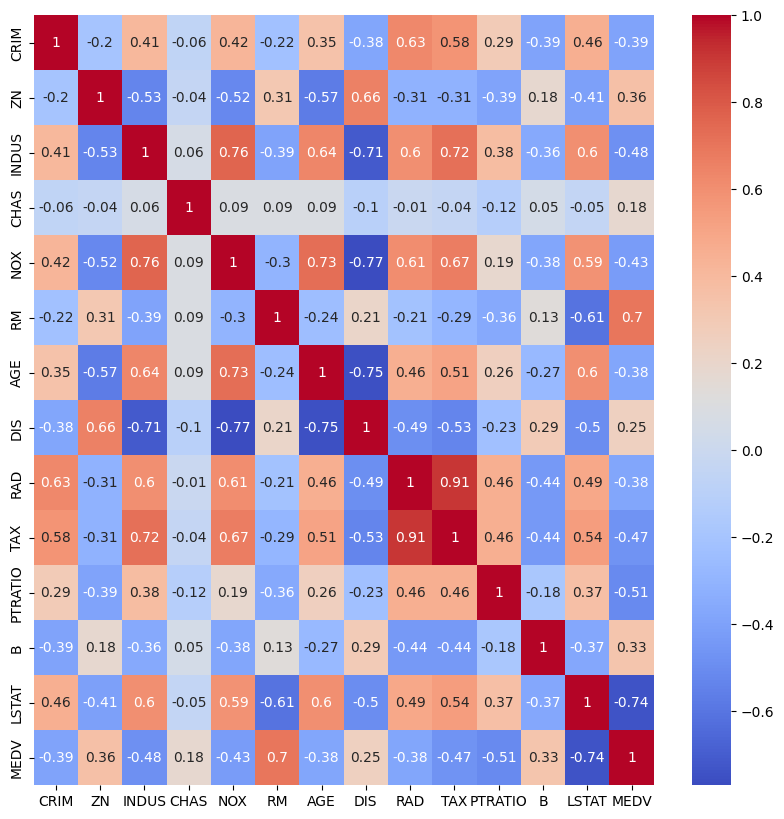

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = df.corr().round(2), annot =True, cmap = "coolwarm")

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

**Observations:**

- To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

- An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

## Model Building

Train-test split is a crucial step in machine learning model development. It involves dividing a dataset into two subsets: a training set used to train the model, and a testing set to evaluate its performance. This ensures an unbiased assessment of the model's generalization capabilities and helps prevent overfitting to the training data.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This code performs a train-test split on a dataset using scikit-learn's `train_test_split` function. 

1. **Feature and Target Variable Separation:**
   ```python
   X = df.drop(['MEDV'], axis=1)
   y = df['MEDV']
   ```
   - `X` is assigned the DataFrame `df` with the 'MEDV' column dropped, representing the feature variables.
   - `y` is assigned the 'MEDV' column, representing the target variable (the variable to be predicted).

2. **Train-Test Split:**
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   ```
   - `train_test_split` divides the dataset into training and testing sets.
   - `X_train` and `y_train` are the feature and target variables for the training set, respectively.
   - `X_test` and `y_test` are the feature and target variables for the testing set, respectively.
   - `test_size=0.3` specifies that 30% of the data will be used for testing, and the remaining 70% for training.
   - `random_state=42` ensures reproducibility by fixing the random seed, so the split will be the same each time the code is run.

In summary, this code prepares the data for machine learning by separating features and target variable and then splitting them into training and testing sets. This is a common practice to assess a model's performance on unseen data and avoid overfitting.

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### Training and testing the model

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

### Model evaluation
We will evaluate our model using RMSE and R2-score.

In [12]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print('RMSE is',(rmse))
print('R2 score is',(r2))

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\nThe model performance for testing set")
print('RMSE is',(rmse))
print('R2 score is',(r2))

The model performance for training set
RMSE is 4.748208239685937
R2 score is 0.7434997532004697

The model performance for testing set
RMSE is 4.63868992617283
R2 score is 0.711226005748492


This code evaluates the performance of a linear regression model on both the training and testing sets using common regression metrics. 

1. **Model Prediction on Training Set:**
   ```python
   y_train_predict = lin_model.predict(X_train)
   ```
   - The trained linear regression model `lin_model` predicts the target variable (`y_train_predict`) based on the feature variables in the training set (`X_train`).

2. **Calculation of Metrics for Training Set:**
   ```python
   rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
   r2 = r2_score(y_train, y_train_predict)
   ```
   - `rmse` calculates the **root mean squared error** between the actual target values (`y_train`) and the predicted values for the training set (`y_train_predict`).
   - `r2` calculates the **R-squared score**, which measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).

3. **Printing Training Set Metrics:**
   - The code prints the performance metrics for the training set, including the RMSE and R2 score.

4. **Model Prediction on Testing Set:**
   ```python
   y_test_predict = lin_model.predict(X_test)
   ```
   - The trained linear regression model predicts the target variable for the testing set (`y_test_predict`) based on the feature variables in the testing set (`X_test`).

5. **Calculation of Metrics for Testing Set:**

   - Similar to the training set, it calculates the RMSE and R2 score for the testing set.

6. **Printing Testing Set Metrics:**
   
   - The code prints the performance metrics for the testing set, allowing the assessment of how well the model generalizes to new, unseen data.

In [13]:
df_coff = pd.DataFrame(lin_model.coef_, 
                       index=X.columns, 
                       columns=['Coefficients'])
df_coff

,Coefficients
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


The output from the code provides insights into the coefficients of a linear regression model (`lin_model`) for predicting housing prices based on different features. Each row in the DataFrame `df_coff` represents a feature, and the corresponding value in the "Coefficients" column indicates the impact of that feature on the predicted target variable (housing prices).

Key insights:

1. **Positive Coefficients:**
   - Features with positive coefficients (e.g., ZN, INDUS, CHAS, RM, RAD, B) positively contribute to the predicted housing prices.
   - For example, an increase in the number of rooms (RM) is associated with an increase in predicted housing prices.

2. **Negative Coefficients:**
   - Features with negative coefficients (e.g., CRIM, NOX, AGE, DIS, TAX, PTRATIO, LSTAT) have a negative impact on the predicted housing prices.
   - For instance, an increase in the crime rate (CRIM) or the percentage of lower-status population (LSTAT) is associated with a decrease in predicted housing prices.

3. **Relative Importance:**
   - The magnitude of the coefficients indicates the relative importance of each feature in influencing the predicted housing prices.
   - Features with larger absolute values have a greater impact on the predictions.
